In [21]:
#Import all the required libraries
import glob, random, json
import warnings

import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

warnings.filterwarnings('ignore')

In [17]:
#Import the dataset and read the image into a seperate variable

images='../../data/flikr8k/Images'
all_imgs = glob.glob(images + '/*.jpg',recursive=True)
print("The total images present in the dataset: {}".format(len(all_imgs)))

data = pd.read_csv("../../data/flikr8k/captions.txt")
data = data.to_dict("records")
print("The total captions present in the dataset: {}".format(len(data)))

img_path_map = {}
for x in all_imgs:
    img_path_map[x.rsplit("/",1)[1]] = x

for x in data:
    if x["image"] in img_path_map:
        x["path"] = img_path_map[x["image"]]
    else:
        print(x["image"])
print("paths of images are mapped to captions")

The total images present in the dataset: 8091
The total captions present in the dataset: 40455
paths of images are mapped to captions


In [18]:
random.sample(data,2)

[{'image': '233270519_d60d4518fa.jpg',
  'caption': 'A man is batting a ball on the beach beside the ocean .',
  'path': '../../data/flikr8k/Images/233270519_d60d4518fa.jpg'},
 {'image': '3151492269_28d8edaa68.jpg',
  'caption': 'A brown dog is running next to a chain link fence while a darker dog stands nearby .',
  'path': '../../data/flikr8k/Images/3151492269_28d8edaa68.jpg'}]

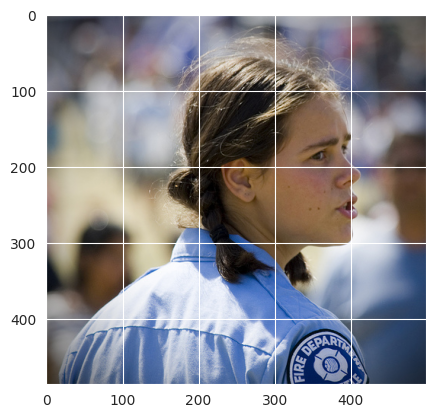

Caption is :  The woman wearing a fire department uniform is talking to people .


In [19]:
#Visualise both the images & text present in the dataset
i = random.randint(0, len(data))
image_sample = Image.open(data[i]["path"])
plt.imshow(image_sample)
plt.show()
print("Caption is : ", data[i]["caption"])

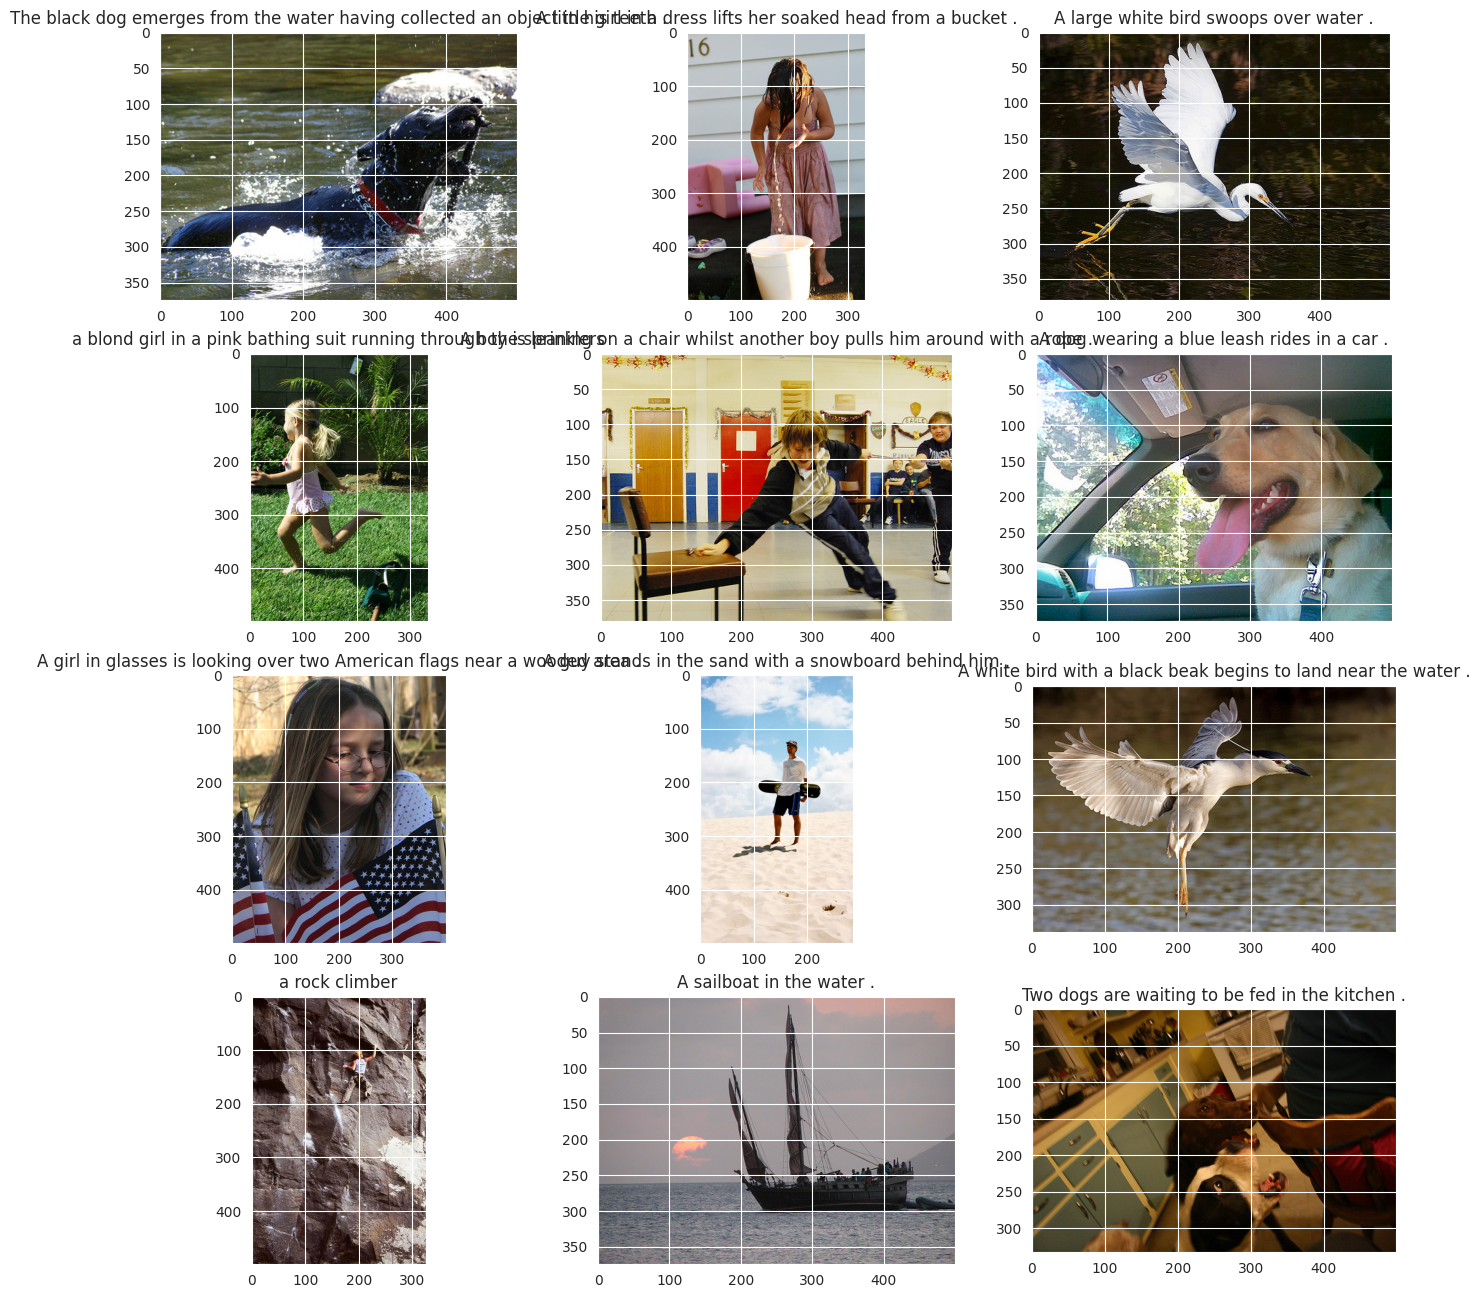

In [20]:
samples = random.sample(data, 12)
rows = 4
cols = 3
img_count = 0

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(16,16))

for i in range(rows):
    for j in range(cols):
        if img_count < len(samples):
            axes[i, j].imshow(Image.open(samples[img_count]["path"]))
            axes[i, j].set_title(samples[img_count]["caption"])
            img_count+=1

In [22]:
with open("../../data/image_caption_mapped.json", "w") as w:
    w.write(json.dumps(data))